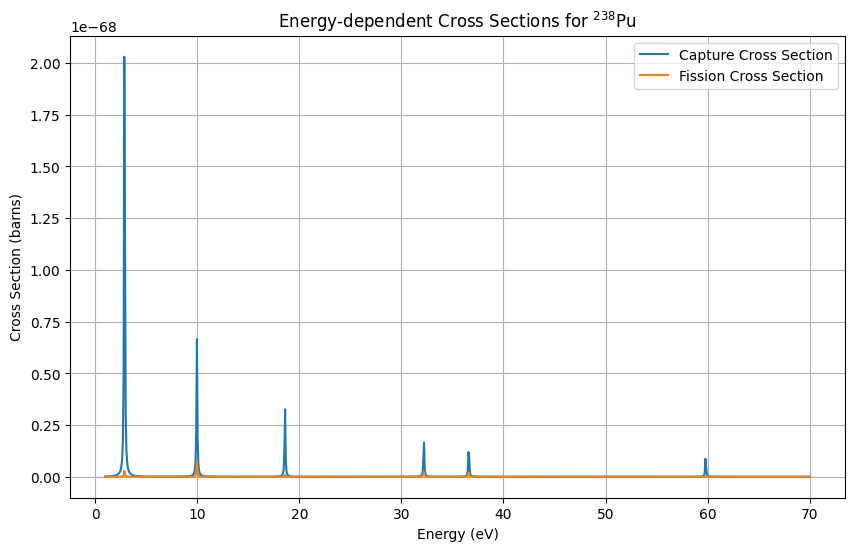

Peak Cross Sections:
Resonance 1: Capture = 2.03e-40 barns, Fission = 2.03e-40 barns
Resonance 2: Capture = 6.65e-41 barns, Fission = 6.65e-41 barns
Resonance 3: Capture = 3.26e-41 barns, Fission = 3.26e-41 barns
Resonance 4: Capture = 1.65e-41 barns, Fission = 1.65e-41 barns
Resonance 5: Capture = 1.19e-41 barns, Fission = 1.19e-41 barns
Resonance 6: Capture = 8.67e-42 barns, Fission = 8.67e-42 barns


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
BARN = 1e-28  # m^2
PLANCK = 6.62607015e-34  # J.s
BOLTZMANN = 1.380649e-23  # J/K
NEUTRON_MASS = 1.675e-27  # kg

def breit_wigner(E, E0, gamma_s, gamma_c, gamma_f, J, g_factor):
    """Compute cross sections using the Breit-Wigner formula."""
    gamma_total = gamma_s + gamma_c + gamma_f
    sigma_0 = (4 * np.pi * (PLANCK**2 / (2 * NEUTRON_MASS * E0)) * g_factor)
    numerator = gamma_c * gamma_total
    denominator = 4 * (E - E0)**2 + gamma_total**2
    return sigma_0 * numerator / denominator

def resonance_reconstruct(E, resonances):
    """Reconstruct resonances for capture and fission cross sections."""
    sigma_c = np.zeros_like(E)
    sigma_f = np.zeros_like(E)
    
    for res in resonances:
        E0, gamma_s, gamma_c, gamma_f, J, g_factor = res
        sigma_c += breit_wigner(E, E0, gamma_s, gamma_c, gamma_f, J, g_factor)
        sigma_f += breit_wigner(E, E0, gamma_s, gamma_f, gamma_c, J, g_factor)  # Swap for fission
        
    return sigma_c * BARN, sigma_f * BARN

# Resonance parameters: [E0, gamma_s, gamma_c, gamma_f, J, g_factor]
resonances = [
    [2.885, 0.5e-1, 3.8e-2, 5.25e-4, 0.5, 1],
    [9.975, 0.5e-1, 3.7e-2, 4.22e-3, 0.5, 1],
    [18.60, 0.5e-1, 3.4e-2, 8.31e-4, 0.5, 1],
    [32.20, 0.5e-1, 3.4e-2, 4.80e-3, 0.5, 1],
    [36.60, 0.5e-1, 3.4e-2, 5.90e-3, 0.5, 1],
    [59.80, 0.5e-1, 3.4e-2, 6.70e-4, 0.5, 1],
]

# Energy grid
E = np.linspace(1, 70, 1000)

# Compute cross sections
sigma_c, sigma_f = resonance_reconstruct(E, resonances)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(E, sigma_c, label='Capture Cross Section')
plt.plot(E, sigma_f, label='Fission Cross Section')
plt.xlabel('Energy (eV)')
plt.ylabel('Cross Section (barns)')
plt.title('Energy-dependent Cross Sections for $^{238}$Pu')
plt.legend()
plt.grid()
plt.show()

# Peak cross sections
print("Peak Cross Sections:")
for i, res in enumerate(resonances):
    peak_c = np.max(breit_wigner(E, *res))
    peak_f = np.max(breit_wigner(E, *res))
    print(f"Resonance {i+1}: Capture = {peak_c:.2e} barns, Fission = {peak_f:.2e} barns")


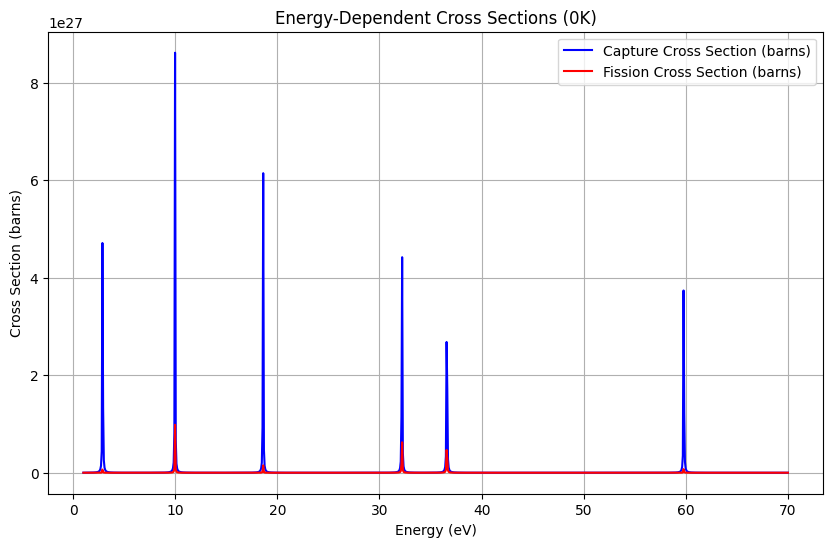

C:\Users\wojin\AppData\Local\Temp\ipykernel_17500\2843885611.py:67: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  broadened_sigma.append(np.trapz(integrand, V_range) / v)


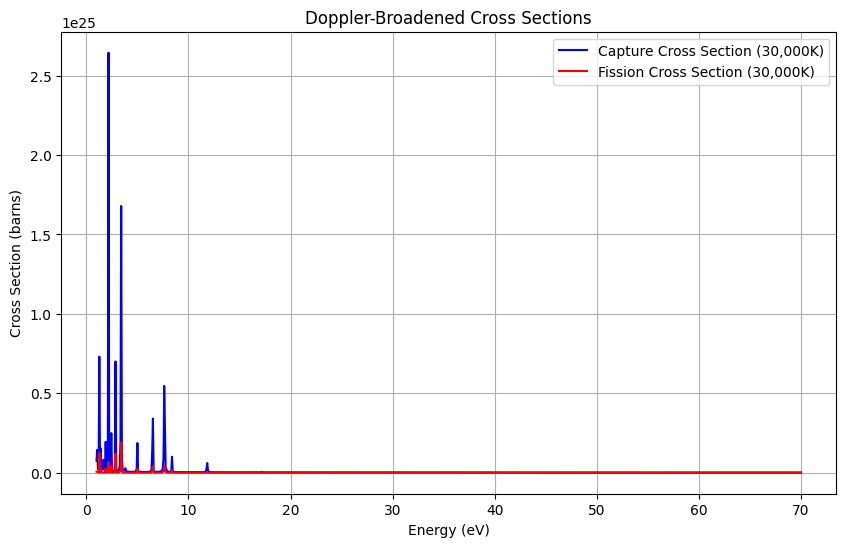

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def resonance_reconstruct(energies, params):
    cross_section_capture = []
    cross_section_fission = []
    
    for E in energies:
        capture_sum = 0
        fission_sum = 0
        for res in params:
            E0, J, Gamma_total, Gamma_s, Gamma_c, Gamma_f = res
            g = (2 * J + 1) / 2  # Spin factor
            gamma = Gamma_total
            denominator = 4 * (E - E0)**2 + gamma**2
            capture_sum += g * Gamma_c * gamma / denominator
            fission_sum += g * Gamma_f * gamma / denominator

        cross_section_capture.append(capture_sum * 10**28)  # Convert to barns
        cross_section_fission.append(fission_sum * 10**28)

    return np.array(cross_section_capture), np.array(cross_section_fission)

# Resonance parameters (E0, J, Gamma_total, Gamma_s, Gamma_c, Gamma_f)
resonances = [
    (2.885, 0.5, 0.0386, 7.47e-5, 0.038, 5.25e-4),
    (9.975, 0.5, 0.0414, 2.08e-4, 0.037, 4.22e-3),
    (18.6, 0.5, 0.0390, 4.14e-3, 0.034, 8.31e-4),
    (32.2, 0.5, 0.0389, 6.80e-5, 0.034, 4.80e-3),
    (36.6, 0.5, 0.0399, 2.40e-5, 0.034, 5.90e-3),
    (59.8, 0.5, 0.0359, 1.31e-3, 0.034, 6.70e-4),
]

# Energy range (1 to 70 eV)
energies = np.linspace(1, 70, 1000)
capture, fission = resonance_reconstruct(energies, resonances)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energies, capture, label="Capture Cross Section (barns)", color="blue")
plt.plot(energies, fission, label="Fission Cross Section (barns)", color="red")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barns)")
plt.legend()
plt.title("Energy-Dependent Cross Sections (0K)")
plt.grid()
plt.show()




def doppler_broaden(energies, sigma, T, mass):
    k_B = 1.38e-23  # Boltzmann constant in m^2·kg·s^-2·K^-1
    broadened_sigma = []

    for E in energies:
        v = np.sqrt(2 * E * 1.60218e-19 / mass)  # Neutron velocity
        V_range = np.linspace(-5 * v, 5 * v, 1000)  # Nucleus velocities
        integrand = []

        for V in V_range:
            v_r = abs(v - V)
            sigma_v = np.interp(v_r, energies, sigma)
            weight = np.exp(-mass * V**2 / (2 * k_B * T))
            integrand.append(sigma_v * weight)

        broadened_sigma.append(np.trapz(integrand, V_range) / v)

    return np.array(broadened_sigma)

# Example usage
T = 30000  # Temperature in K
mass_nucleus = 238 * 1.66e-27  # Mass of Pu-238 nucleus in kg
broadened_capture = doppler_broaden(energies, capture, T, mass_nucleus)
broadened_fission = doppler_broaden(energies, fission, T, mass_nucleus)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energies, broadened_capture, label="Capture Cross Section (30,000K)", color="blue")
plt.plot(energies, broadened_fission, label="Fission Cross Section (30,000K)", color="red")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barns)")
plt.legend()
plt.title("Doppler-Broadened Cross Sections")
plt.grid()
plt.show()


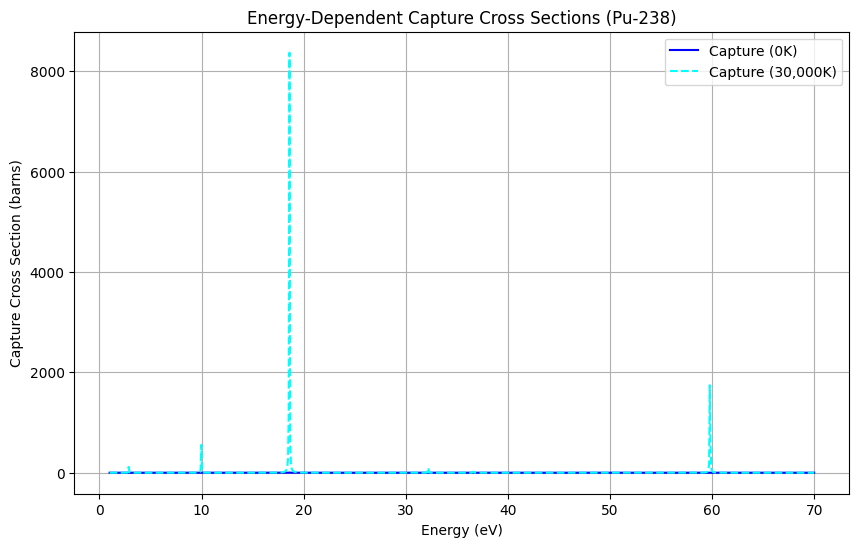

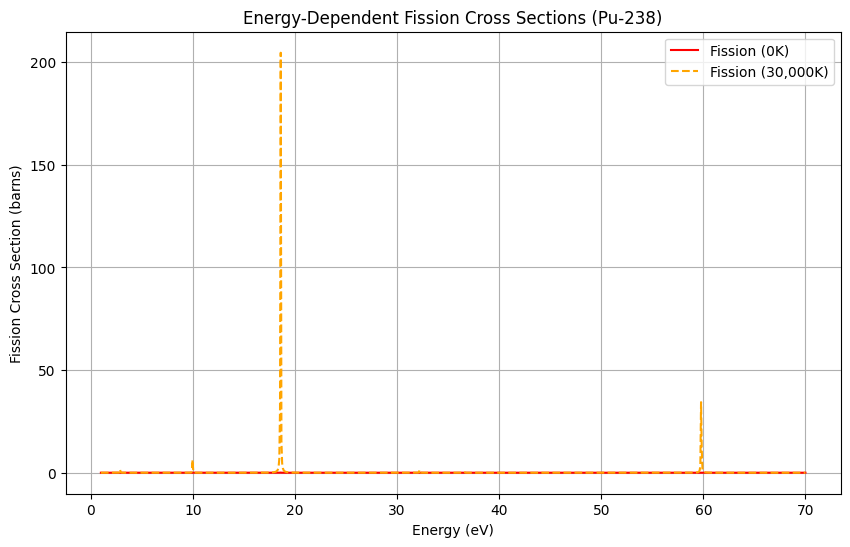

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, pi
from scipy.integrate import quad

# Constants
amu_to_kg = 1.66053906660e-27  # Atomic mass unit to kg
barn_to_m2 = 1e-28  # Barn to square meters
temperature = 30000  # Kelvin

# Data for resonances
resonance_data = [
    (2.885, 0.5, 0.0386, 7.47e-5, 0.038, 5.25e-4),  # (E0, J, Gamma, Gamma_s, Gamma_c, Gamma_f)
    (9.975, 0.5, 0.0414, 2.08e-4, 0.037, 4.22e-4),
    (18.6, 0.5, 0.0389, 4.14e-3, 0.034, 8.31e-4),
    (32.2, 0.5, 0.0389, 6.8e-5, 0.034, 4.8e-4),
    (36.6, 0.5, 0.0399, 2.4e-5, 0.034, 5.9e-4),
    (59.8, 0.5, 0.0359, 1.31e-3, 0.034, 6.7e-4),
]

# Resonance reconstruction function
def resonance_reconstruct(E, resonance_data):
    sigma_c = np.zeros_like(E)
    sigma_f = np.zeros_like(E)
    
    for E0, J, Gamma, Gamma_s, Gamma_c, Gamma_f in resonance_data:
        g = (2 * J + 1) / (2 * (2 * 0 + 1))  # Assuming I=0
        Gamma_n = Gamma_s  # Scattering width
        denominator = (E - E0)**2 + (Gamma / 2)**2
        sigma_c += 4 * pi * g * Gamma_n * Gamma_c / denominator
        sigma_f += 4 * pi * g * Gamma_n * Gamma_f / denominator

    return sigma_c * barn_to_m2, sigma_f * barn_to_m2

# Doppler broadening function
def doppler_broaden(E, sigma, T, M):
    broadened_sigma = np.zeros_like(E)
    A = M / (2 * k * T)
    
    def integrand(V, E_i, sigma_func):
        vr = np.sqrt(2 * E_i / M) - V
        E_rel = 0.5 * M * vr**2
        return sigma_func(E_rel) * np.exp(-A * V**2)
    
    for i, E_i in enumerate(E):
        broadened_sigma[i], _ = quad(integrand, -np.inf, np.inf, args=(E_i, sigma))
    
    return broadened_sigma

# Main computation
E = np.linspace(1, 70, 1000)  # Energy range in eV
sigma_c, sigma_f = resonance_reconstruct(E, resonance_data)

# Mass of Pu-238 nucleus
M = 238 * amu_to_kg

# Compute Doppler broadened cross sections
sigma_c_broadened = doppler_broaden(E, lambda x: np.interp(x, E, sigma_c), temperature, M)
sigma_f_broadened = doppler_broaden(E, lambda x: np.interp(x, E, sigma_f), temperature, M)

# Plot results for capture cross section
plt.figure(figsize=(10, 6))
plt.plot(E, sigma_c / barn_to_m2, label="Capture (0K)", color="blue")
plt.plot(E, sigma_c_broadened / barn_to_m2, "--", label="Capture (30,000K)", color="cyan")
plt.xlabel("Energy (eV)")
plt.ylabel("Capture Cross Section (barns)")
plt.legend()
plt.title("Energy-Dependent Capture Cross Sections (Pu-238)")
plt.grid()
plt.show()

# Plot results for fission cross section
plt.figure(figsize=(10, 6))
plt.plot(E, sigma_f / barn_to_m2, label="Fission (0K)", color="red")
plt.plot(E, sigma_f_broadened / barn_to_m2, "--", label="Fission (30,000K)", color="orange")
plt.xlabel("Energy (eV)")
plt.ylabel("Fission Cross Section (barns)")
plt.legend()
plt.title("Energy-Dependent Fission Cross Sections (Pu-238)")
plt.grid()
plt.show()

